# Analyses of multiple large populations

In [1]:
import pickle
import gzip
import numpy as np
import pandas as pd
from scipy import stats

from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Load data

In [2]:
%ls saved_simulations/

large-neutral-1000_MultiSim/         large-selection_1p5-1000_MultiSim/
large-neutral-100_MultiSim.pkl.gz    large-selection_3-1000_MultiSim/
large-selection-100_MultiSim.pkl.gz  large-selection_6-1000_MultiSim/
large-selection_0p3-1000_MultiSim/


In [3]:
%%time

# SELECTION = 3 POPULAITONS
prefix = './saved_simulations/large-selection_3-1000_MultiSim/'
selection_3 = []

for i in range(1000):
    file_path = prefix + 'population_' + '%s' %(i) + '.pkl.gz'
    data = pd.read_pickle(file_path, compression='gzip')
    selection_3.append(data)
print(len(selection_3))
print(type(selection_3[0]))

1000
<class 'pandas.core.frame.DataFrame'>
CPU times: user 1min 54s, sys: 58 s, total: 2min 52s
Wall time: 3min 15s


## Maximum allele frequencies

In [4]:
%%time
selection_3_MaxAFs = get_max_AFs(selection_3, det_lim=100)

CPU times: user 4.5 s, sys: 13.9 s, total: 18.4 s
Wall time: 59 s


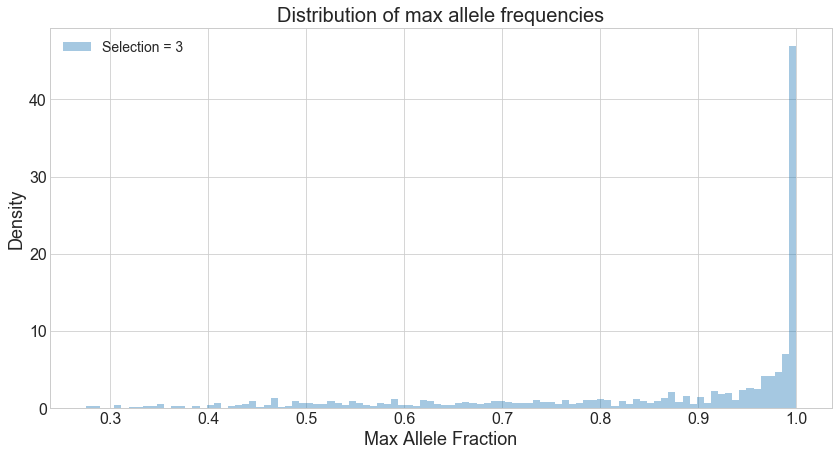

In [5]:
sns.distplot(selection_3_MaxAFs, bins=100, norm_hist=True, kde=False, label="Selection = 3");
plt.title('Distribution of max allele frequencies');
plt.xlabel('Max Allele Fraction');
plt.ylabel('Density');
#plt.ylim(0, 5);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_3-MaxAFs.png')
plt.show()

## Heterogeneity

In [6]:
%%time
selection_3_H = get_heterogeneity(selection_3, det_lim=100)

CPU times: user 3.67 s, sys: 7.86 s, total: 11.5 s
Wall time: 18.6 s


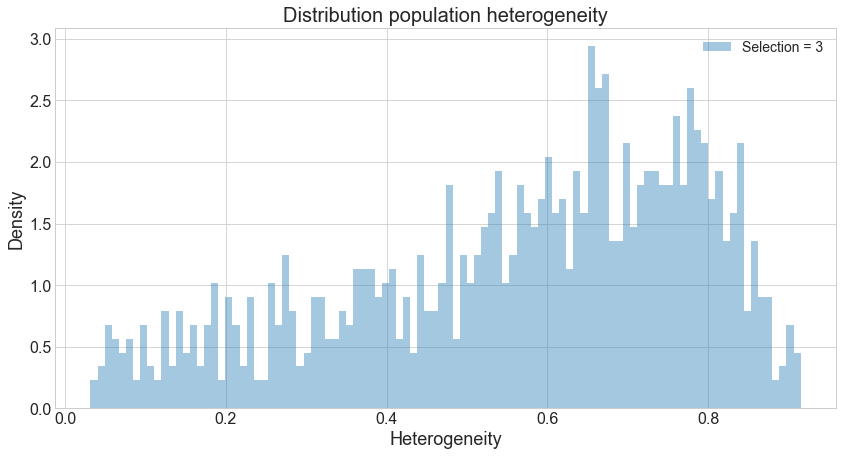

In [7]:
sns.distplot(selection_3_H, bins=100, norm_hist=True, kde=False, label="Selection = 3");
plt.title('Distribution population heterogeneity');
plt.xlabel('Heterogeneity');
plt.ylabel('Density');
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_3-Heterogeneity.png')
plt.show()

## Mutational burden (number of mutations distrbution)

In [8]:
%%time
selection_3_mut_distr = get_mutation_distributions(selection_3, det_lim=100)

CPU times: user 1min 14s, sys: 7.14 s, total: 1min 21s
Wall time: 1min 28s


In [9]:
selection_3_mut_distr.to_csv('./simulation_data/Large-1000_sim-selection_3_mut_distr.csv')

In [10]:
selection_3_avg_nmd = selection_3_mut_distr.mean()
selection_3_std_nmd = selection_3_mut_distr.std()

In [11]:
%%time
selection_3_avg_num_mut = avg_num_mutations(selection_3_avg_nmd)

CPU times: user 1.53 ms, sys: 444 µs, total: 1.97 ms
Wall time: 2.19 ms


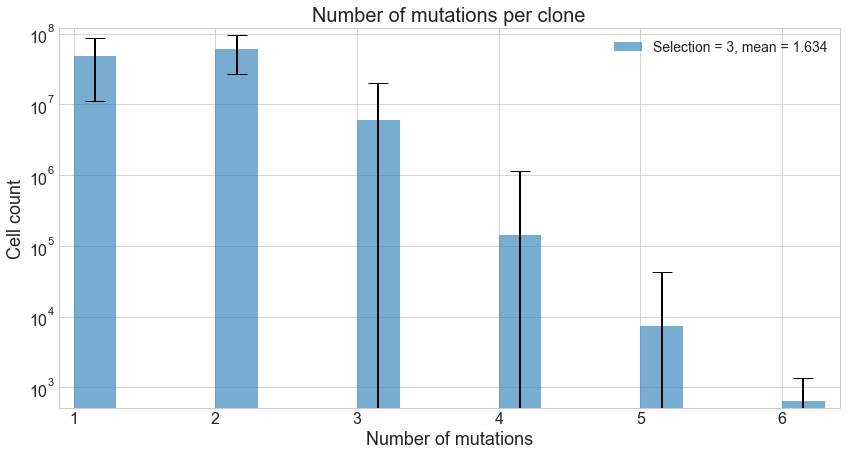

In [12]:
selection_3_errors = selection_3_std_nmd.values

plt.bar(left=selection_3_avg_nmd.index+0.15, height=selection_3_avg_nmd.values, width=0.3, alpha=0.6, align='center',
        yerr=selection_3_errors, capsize=10, 
        label="Selection = 3, mean = %s" %(round(selection_3_avg_num_mut, 3)));

plt.title("Number of mutations per clone");
plt.xlabel('Number of mutations');
plt.ylabel('Cell count');
plt.yscale('log');
plt.xticks(list(selection_3_avg_nmd.index));
plt.margins(0.02);
plt.legend();
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_3-Num_mutations.png')
plt.show()

## Total number of mutations

In [13]:
%%time
selection_3_total_m = get_total_mutations(selection_3, det_lim=1)

CPU times: user 12.6 s, sys: 41.8 s, total: 54.4 s
Wall time: 2min 11s


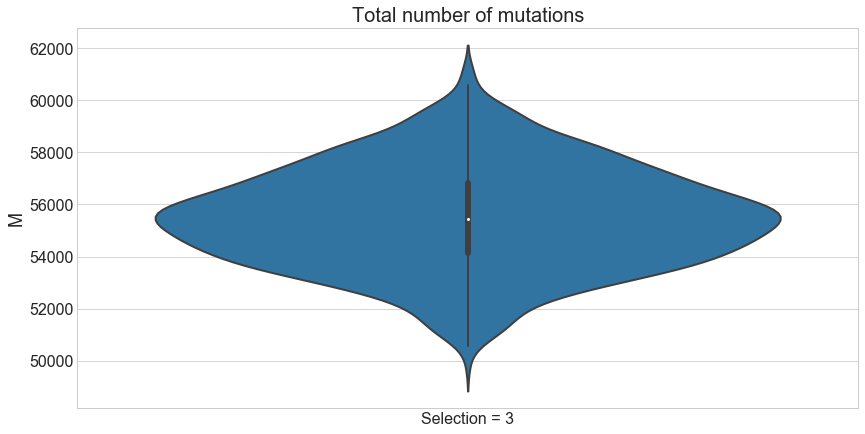

In [14]:
sns.violinplot(data=[selection_3_total_m]);
plt.title("Total number of mutations");
plt.ylabel("M");
plt.xticks([0], ["Selection = 3"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_3-Total_num_mutations.png')
plt.show()

## Errors in reconstruction of mutational timeline

Make sure that the vaue for **alpha** is correct!

In [15]:
alpha = 0.3

In [16]:
%%time
selection_3_rec_errors = get_reconstruction_errors(selection_3, alpha, det_lim=100)

CPU times: user 2min 46s, sys: 13.4 s, total: 2min 59s
Wall time: 3min 32s


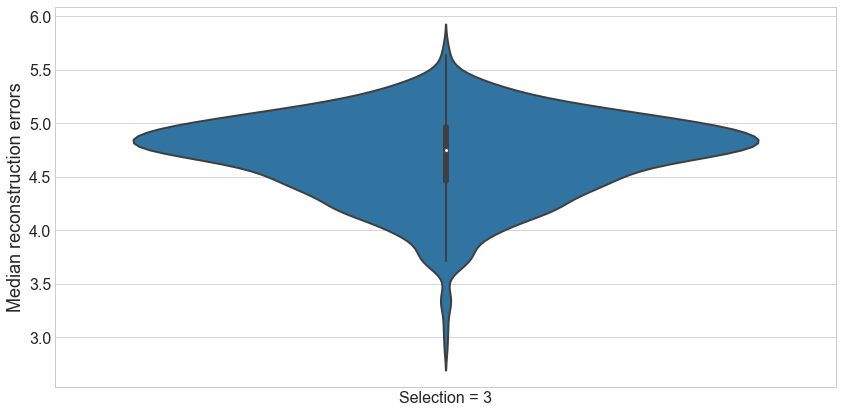

In [17]:
sns.violinplot(data=[selection_3_rec_errors]);
plt.ylabel("Median reconstruction errors");
plt.xticks([0], ["Selection = 3"]);
plt.savefig('./Figures/MultiSim-Large-1000_sim/Large-selection_3-Rec_errors.png')
plt.show()

## Export data

In [18]:
d = pd.DataFrame()
d["selection_3_MaxAFs"] = selection_3_MaxAFs
d["selection_3_H"] = selection_3_H
d["selection_3_total_m"] = selection_3_total_m
d["selection_3_rec_errors"] = selection_3_rec_errors

d.to_csv('./simulation_data/Large-selection_3-1000_sim-Analyzed_data.csv')